# Final Four Basketball Teams Project
<hr>

## Objectives

We will confidently use several classification methods to determine the most likely basketball teams that make to the semifinal round, a.k.a. the Final Four.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# About the Dataset
<hr>

This dataset is about the performance of basketball teams. The **cbb.csv** data set includes performance data about five seasons of 354 basketball teams. It includes following fields:

| Field      | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ---------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| TEAM       | The Division I college basketball school                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| CONF       | The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference) |
| G          | Number of games played                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| W          | Number of games won                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| ADJOE      | Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ADJDE      | Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BARTHAG    | Power Rating (Chance of beating an average Division I team)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| EFG_O      | Effective Field Goal Percentage Shot                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EFG_D      | Effective Field Goal Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| TOR        | Turnover Percentage Allowed (Turnover Rate)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| TORD       | Turnover Percentage Committed (Steal Rate)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| ORB        | Offensive Rebound Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| DRB        | Defensive Rebound Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| FTR        | Free Throw Rate (How often the given team shoots Free Throws)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| FTRD       | Free Throw Rate Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| 2P_O       | Two-Point Shooting Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| 2P_D       | Two-Point Shooting Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| 3P_O       | Three-Point Shooting Percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| 3P_D       | Three-Point Shooting Percentage Allowed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| ADJ_T      | Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| WAB        | Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| POSTSEASON | Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| SEED       | Seed in the NCAA March Madness Tournament                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| YEAR       | Season                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |


## Load the Dataset

In [4]:
pdf = pd.read_csv('datasets/cbb.csv')

In [22]:
pdf.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


In [21]:
print(pdf.info())
print(pdf.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        1406 non-null   object 
 1   CONF        1406 non-null   object 
 2   G           1406 non-null   int64  
 3   W           1406 non-null   int64  
 4   ADJOE       1406 non-null   float64
 5   ADJDE       1406 non-null   float64
 6   BARTHAG     1406 non-null   float64
 7   EFG_O       1406 non-null   float64
 8   EFG_D       1406 non-null   float64
 9   TOR         1406 non-null   float64
 10  TORD        1406 non-null   float64
 11  ORB         1406 non-null   float64
 12  DRB         1406 non-null   float64
 13  FTR         1406 non-null   float64
 14  FTRD        1406 non-null   float64
 15  2P_O        1406 non-null   float64
 16  2P_D        1406 non-null   float64
 17  3P_O        1406 non-null   float64
 18  3P_D        1406 non-null   float64
 19  ADJ_T       1406 non-null  

## Add Column
Next we'll add a column that will contain "true" if the wins above bubble `WAB` are over 7 and "false" if not. We'll call this column Win Index or "windex" for short.

In [27]:
pdf['windex'] = pdf['WAB']>7

In [28]:
pdf.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016,True
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016,True
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True


# Data Visualization and Preprocessing
<hr>

Next we'll filter the data set to the teams that made the Sweet Sixteen, the Elite Eight, and the Final Four in the `POSTSEASON`. We'll also create a new dataframe that will hold the values with the new column.
- Sweet Sixteen = S16
- Elite Eight = E8
- Final Four = F4

In [42]:
df1 = pdf[(pdf.POSTSEASON =='S16') | (pdf.POSTSEASON == 'E8') | (pdf.POSTSEASON == 'F4')]
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,False
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,True
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,True
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,False
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,False


In [45]:
df1.POSTSEASON.value_counts()

S16    32
E8     16
F4      8
Name: POSTSEASON, dtype: int64

32 teams made it into the Sweet Sixteen, 16 into the Elite Eight, and 8 made it into the Final Four over 5 seasons.

Lets plot some columns to understand data better:

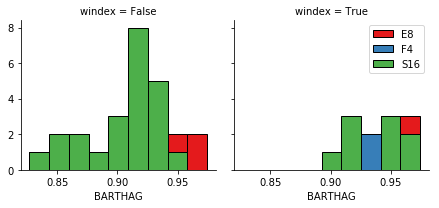

In [54]:
bins = np.linspace( df1.BARTHAG.min(), df1.BARTHAG.max(), 10)
g = sns.FacetGrid( df1, col='windex', hue='POSTSEASON', palette='Set1', col_wrap=6)
g.map(plt.hist, 'BARTHAG', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

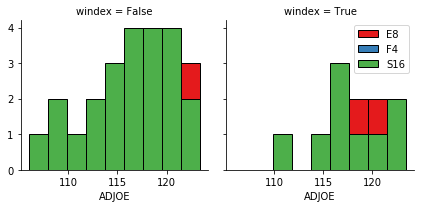

In [55]:
bins = np.linspace(df1.ADJOE.min(), df1.ADJOE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJOE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing: Feature selection/extraction
<hr>

Lets look at how Adjusted Defense Efficiency plots

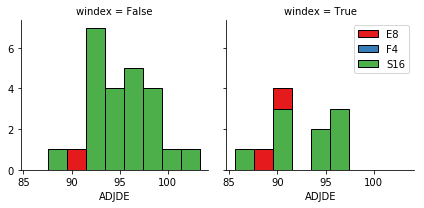

In [56]:
bins = np.linspace(df1.ADJDE.min(), df1.ADJDE.max(), 10)
g = sns.FacetGrid(df1, col="windex", hue="POSTSEASON", palette="Set1", col_wrap=2)
g.map(plt.hist, 'ADJDE', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that this data point doesn't impact the ability of a team to get into the Final Four.

In [57]:
df1.corr()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR,windex
G,1.000000,0.479843,0.095414,-0.229728,0.226840,0.023710,-0.089852,-0.138391,0.231805,-0.015877,...,0.039281,0.023961,0.024469,0.000821,-0.168048,0.024946,0.203429,-0.053748,0.287338,0.213675
W,0.479843,1.000000,0.451772,-0.277480,0.609136,0.458012,-0.363194,-0.177485,-0.030345,0.004494,...,-0.127949,0.445506,-0.306237,0.278625,-0.234721,0.309708,0.742943,-0.599097,0.284646,0.556647
ADJOE,0.095414,0.451772,1.000000,0.305655,0.635846,0.700138,0.257311,-0.477189,-0.238384,0.032695,...,-0.287792,0.546222,0.105533,0.562111,0.252183,0.358982,0.595402,-0.637296,-0.007698,0.261399
ADJDE,-0.229728,-0.277480,0.305655,1.000000,-0.510694,0.369546,0.660132,-0.226590,-0.348080,-0.194637,...,-0.208912,0.232895,0.522122,0.353368,0.437101,0.033384,-0.348367,0.207767,-0.333862,-0.335778
BARTHAG,0.226840,0.609136,0.635846,-0.510694,1.000000,0.305687,-0.259781,-0.205548,0.099681,0.213080,...,-0.049978,0.255937,-0.293735,0.230257,-0.100001,0.294268,0.810319,-0.748212,0.208947,0.491625
EFG_O,0.023710,0.458012,0.700138,0.369546,0.305687,1.000000,0.132522,-0.291054,-0.385875,-0.380921,...,-0.537987,0.846035,0.075416,0.737931,0.116584,0.233997,0.303676,-0.324214,-0.043674,0.049370
EFG_D,-0.089852,-0.363194,0.257311,0.660132,-0.259781,0.132522,1.000000,-0.244326,0.206033,-0.142419,...,0.102122,0.012204,0.772563,0.195570,0.659519,0.012401,-0.232906,0.141863,-0.199792,-0.298706
TOR,-0.138391,-0.177485,-0.477189,-0.226590,-0.205548,-0.291054,-0.244326,1.000000,0.032018,0.436421,...,0.101451,-0.243787,-0.188687,-0.222022,-0.174087,-0.024886,-0.143347,0.252221,0.024390,0.050772
TORD,0.231805,-0.030345,-0.238384,-0.348080,0.099681,-0.385875,0.206033,0.032018,1.000000,0.119761,...,0.673726,-0.372450,0.202479,-0.251988,0.072615,0.018187,-0.101849,0.104160,0.148471,-0.186312
ORB,-0.015877,0.004494,0.032695,-0.194637,0.213080,-0.380921,-0.142419,0.436421,0.119761,1.000000,...,0.254024,-0.278084,-0.244823,-0.338380,0.041667,0.212289,0.170714,-0.180612,0.012960,0.134292


## Convert Categorical Features to Numerical Values

In [59]:
from sklearn.preprocessing import LabelEncoder

Lets convert wins above bubble (winindex) under 7 to 0 and over 7 to 1:

In [71]:
df1.windex = LabelEncoder().fit_transform(df1.windex)

In [72]:
df1.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,windex
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016,0
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016,1
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016,1
5,Oregon,P12,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,...,52.6,46.1,34.4,36.2,69.0,6.7,E8,1.0,2016,0
6,Syracuse,ACC,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,...,47.2,48.1,36.0,30.7,65.5,-0.3,F4,10.0,2016,0


In [73]:
df1.groupby(['windex'])['POSTSEASON'].value_counts(normalize=True)

windex  POSTSEASON
0       S16           0.605263
        E8            0.263158
        F4            0.131579
1       S16           0.500000
        E8            0.333333
        F4            0.166667
Name: POSTSEASON, dtype: float64

13% of teams with 6 or less wins above bubble make it into the final four while 17% of teams with 7 or more do.

## Feature Selection

Lets defind feature sets, X:

In [75]:
X = df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
X[0:5]

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,windex
2,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,14.8,32.7,...,32.9,26.0,52.9,46.5,37.4,36.9,65.5,2.3,6.0,0
3,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,18.8,29.9,...,32.1,33.4,52.6,46.3,40.3,34.7,61.9,8.6,1.0,1
4,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,18.5,32.2,...,38.6,37.3,52.7,43.4,41.3,32.5,70.1,11.6,1.0,1
5,37,30,118.4,96.2,0.9163,52.3,48.9,16.1,20.2,34.1,...,40.3,32.0,52.6,46.1,34.4,36.2,69.0,6.7,1.0,0
6,37,23,111.9,93.6,0.8857,50.0,47.3,18.1,20.4,33.5,...,35.4,28.0,47.2,48.1,36.0,30.7,65.5,-0.3,10.0,0


What are our lables? Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)|

In [76]:
y = df1.POSTSEASON.values
y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

## Normalize Data

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
dataScaler = StandardScaler()

In [79]:
X = dataScaler.fit_transform(X)
X[0:5]

array([[-0.43331874, -1.26140173,  0.28034482,  2.74329908, -2.45717765,
         0.10027963,  0.94171924, -1.16188145, -1.71391372,  0.12750511,
         1.33368704, -0.4942211 , -0.87998988,  0.02784185,  0.00307239,
         0.22576157,  1.59744386, -1.12106011, -1.0448016 ,  0.49716104,
        -0.6882472 ],
       [ 0.40343468,  0.35874728,  0.64758014, -0.90102957,  1.127076  ,
         0.39390887,  0.38123706, -1.29466791, -0.03522254, -0.62979797,
        -1.31585883, -0.68542235,  0.55458056, -0.07167795, -0.0829545 ,
         1.32677295,  0.65081046, -2.369021  ,  0.98050611, -1.14054592,
         1.45296631],
       [ 0.40343468,  1.33083669,  0.87710222, -1.0788017 ,  1.29403598,
         0.72424177, -1.30020946,  0.49794919, -0.16112438, -0.00772758,
        -0.27908001,  0.86808783,  1.31063795, -0.03850468, -1.33034432,
         1.70643205, -0.29582294,  0.47355659,  1.94493836, -1.14054592,
         1.45296631],
       [ 0.40343468,  0.68277708,  0.30329703,  0.63966222

# Training and Validation
<hr>

In [186]:
from sklearn.metrics import jaccard_score, classification_report, accuracy_score, f1_score, log_loss

In [80]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [84]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (44, 21) (44,)
Validation set: (12, 21) (12,)


Now, we will use the training set to build an accurate model. Then use the validation set  to report the accuracy of the model.

We can use the following algorithms:

-   K Nearest Neighbor(KNN)
-   Decision Tree
-   Support Vector Machine
-   Logistic Regression

## K Nearest Neighbor (KNN)

**Question 1**: Build a KNN model using a value of k equals five, find the accuracy on the validation data (X_val and y_val)

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
knnModel = KNeighborsClassifier( n_neighbors=5)

In [90]:
ourModel = knnModel.fit(X_train,y_train)

In [91]:
y_pred = ourModel.predict(X_val)

In [94]:
accuracy_score(y_val, y_pred)

0.6666666666666666

**Question 2**: Determine and print the accuracy for the first 15 values of k the on the validation data:

In [98]:
def knnClassification(Kneigh, X_train, y_train, X_val, y_val):
    acc_list = []
    
    for k in range(1,Kneigh+1):
        knnModel = KNeighborsClassifier( n_neighbors=k)
        ourModel = knnModel.fit(X_train,y_train)
        y_pred = ourModel.predict(X_val)
        acc_list.append(accuracy_score(y_val, y_pred))
    
    return acc_list

In [99]:
knnClassification(15, X_train, y_train, X_val, y_val)

[0.3333333333333333,
 0.3333333333333333,
 0.5,
 0.5833333333333334,
 0.6666666666666666,
 0.5833333333333334,
 0.5833333333333334,
 0.6666666666666666,
 0.5833333333333334,
 0.5833333333333334,
 0.5833333333333334,
 0.5,
 0.5833333333333334,
 0.5833333333333334,
 0.5833333333333334]

## Decision Tree

The following lines of code fit a <code>DecisionTreeClassifier</code>:

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
treeModel = DecisionTreeClassifier()

In [125]:
ourModel = treeModel.fit(X_train, y_train)

In [126]:
y_pred = ourModel.predict(X_val)

In [127]:
acc_default = accuracy_score(y_val, y_pred)

In [128]:
acc_default

0.4166666666666667

<b>Question  3</b> Determine the minimum   value for the parameter <code>max_depth</code> that improves results 


In [130]:
acc_new = 0
cand_dept = 1
acc_list = []
while (acc_new < acc_default):
    
    treeModel = DecisionTreeClassifier( max_depth=cand_dept)
    ourModel = treeModel.fit(X_train, y_train)
    y_pred = ourModel.predict(X_val)
    acc_new = accuracy_score(y_val, y_pred)
    acc_list.append(acc_new)

print('Minimum value for max_depth that improves results:',cand_dept)
print('Accuracy with max_depth {}: {}'.format(cand_dept, acc_list[-1]))

Minimum value for max_depth that improves results: 1
Accuracy with max_depth 1: 0.6666666666666666


## Support Vector Machine

**Question 4** Train the support vector machine model and determine the accuracy on the validation data for each kernel. Find the kernel (linear, poly, rbf, sigmoid) that provides the best score on the validation data and train a SVM using it.

In [135]:
from sklearn import svm
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [145]:
acc_dict = {}

In [147]:
acc_dict = {}
for kernel in kernels:

    svmInstance = svm.SVC( kernel=kernel)
    svmModel = svmInstance.fit(X_train, y_train)
    y_pred = svmModel.predict(X_val)
    acc_dict[kernel] = accuracy_score(y_val, y_pred)

In [159]:
np.max(list(acc_dict.values()))

0.6666666666666666

In [161]:
print('Kernel poly provides the best accuracy with score: {}'.format(acc_dict['poly']))

Kernel poly provides the best accuracy with score: 0.6666666666666666


## Logistic Regression

<b>Question 5</b> Train a logistic regression model and determine the accuracy of the validation data (set C=0.01)

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
logres = LogisticRegression( C=0.01)

In [164]:
logresModel = logres.fit(X_train, y_train)

In [165]:
y_pred = logresModel.predict(X_val)

In [166]:
accuracy_score(y_val, y_pred)

0.5833333333333334

# Model Evaluation Using Test Set
<hr>

## Load Test Set

In [199]:
test_df = pd.read_csv('datasets/basketball_test.csv',error_bad_lines=False)
test_df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Villanova,BE,40,35,123.1,90.9,0.9703,56.1,46.7,16.3,...,30.0,57.4,44.1,36.2,33.9,66.7,8.9,Champions,2.0,2016
2,Notre Dame,ACC,36,24,118.3,103.3,0.8269,54.0,49.5,15.3,...,26.0,52.9,46.5,37.4,36.9,65.5,2.3,E8,6.0,2016
3,Virginia,ACC,37,29,119.9,91.0,0.9600,54.8,48.4,15.1,...,33.4,52.6,46.3,40.3,34.7,61.9,8.6,E8,1.0,2016
4,Kansas,B12,37,32,120.9,90.4,0.9662,55.7,45.1,17.8,...,37.3,52.7,43.4,41.3,32.5,70.1,11.6,E8,1.0,2016


## Test Set Preprocessing

In [200]:
test_df['windex'] = np.where(test_df.WAB > 7, 'True', 'False')
test_df1 = test_df[test_df['POSTSEASON'].str.contains('F4|S16|E8', na=False)]
test_Feature = test_df1[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED', 'windex']]
test_Feature['windex'].replace(to_replace=['False','True'], value=[0,1],inplace=True)
test_X=test_Feature
test_X= StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

C:\Users\Diardano Raihan\Anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


array([[-4.08074446e-01, -1.10135297e+00,  3.37365934e-01,
         2.66479976e+00, -2.46831661e+00,  2.13703245e-01,
         9.44090550e-01, -1.19216365e+00, -1.64348924e+00,
         1.45405982e-02,  1.29523097e+00, -6.23533182e-01,
        -9.31788560e-01,  1.42784371e-01,  1.68876201e-01,
         2.84500844e-01,  1.62625961e+00, -8.36649260e-01,
        -9.98500539e-01,  4.84319174e-01, -6.77003200e-01],
       [ 3.63958290e-01,  3.26326807e-01,  7.03145068e-01,
        -7.13778644e-01,  1.07370841e+00,  4.82633172e-01,
         4.77498943e-01, -1.32975879e+00, -6.86193316e-02,
        -7.35448152e-01, -1.35447914e+00, -8.06829025e-01,
         3.41737757e-01,  4.96641291e-02,  9.40576311e-02,
         1.37214061e+00,  6.93854620e-01, -2.00860931e+00,
         9.80549967e-01, -1.19401460e+00,  1.47709789e+00],
       [ 3.63958290e-01,  1.18293467e+00,  9.31757027e-01,
        -8.78587347e-01,  1.23870131e+00,  7.85179340e-01,
        -9.22275877e-01,  5.27775662e-01, -1.86734575e

In [221]:
test_y = test_df1['POSTSEASON'].values
test_y[0:5]

array(['E8', 'E8', 'E8', 'E8', 'F4'], dtype=object)

## KNN

In [202]:
knnModel = KNeighborsClassifier( n_neighbors=5)
ourModel = knnModel.fit(X_train,y_train)
y_pred = ourModel.predict(test_X)
acc = accuracy_score(test_y, y_pred)
jacc = jaccard_score(test_y, y_pred, average='micro')
f1 = f1_score(test_y, y_pred, average='micro')

print('KNN Classification Accuracy: {}'.format(acc))
print('KNN Classification Jaccard: {}'.format(jacc))
print('KNN Classification F1-Score: {}'.format(f1))

KNN Classification Accuracy: 0.6285714285714286
KNN Classification Jaccard: 0.4583333333333333
KNN Classification F1-Score: 0.6285714285714286


## Decisiont Tree

In [203]:
treeModel = DecisionTreeClassifier( max_depth=1)
ourModel = treeModel.fit(X_train, y_train)
y_pred = ourModel.predict(test_X)
acc = accuracy_score(test_y, y_pred)
jacc = jaccard_score(test_y, y_pred, average='micro')
f1 = f1_score(test_y, y_pred, average='micro')

print('D.T. Classification Accuracy: {}'.format(acc))
print('D.T. Classification Jaccard: {}'.format(jacc))
print('D.T. Classification F1-Score: {}'.format(f1))

D.T. Classification Accuracy: 0.6428571428571429
D.T. Classification Jaccard: 0.47368421052631576
D.T. Classification F1-Score: 0.6428571428571429


## SVM

In [214]:
svmInstance = svm.SVC(kernel='poly')
svmModel = svmInstance.fit(X_train, y_train)
y_pred = svmModel.predict(test_X)
acc = accuracy_score(test_y, y_pred)
jacc = jaccard_score(test_y, y_pred, average='micro')
f1 = f1_score(test_y, y_pred, average='micro')

print('SVM Classification Accuracy: {}'.format(acc))
print('SVM Classification Jaccard: {}'.format(jacc))
print('SVM Classification F1-Score: {}'.format(f1))

SVM Classification Accuracy: 0.6857142857142857
SVM Classification Jaccard: 0.5217391304347826
SVM Classification F1-Score: 0.6857142857142857


## Logistic Regression

In [230]:
logres = LogisticRegression( C=0.01)
logresModel = logres.fit(X_train, y_train)
y_pred = logresModel.predict(test_X)
y_pred_prob = logresModel.predict_proba(test_X)
acc = accuracy_score(test_y, y_pred)
jacc = jaccard_score(test_y, y_pred, average='micro')
f1 = f1_score(test_y, y_pred, average='micro')
logloss = log_loss(test_y, y_pred_prob)


print('LogReg Classification Accuracy: {}'.format(acc))
print('LogReg Classification Jaccard: {}'.format(jacc))
print('LogReg Classification F1-Score: {}'.format(f1))
print('LogReg Classification LogLoss: {}'.format(logloss))

LogReg Classification Accuracy: 0.5714285714285714
LogReg Classification Jaccard: 0.4
LogReg Classification F1-Score: 0.5714285714285714
LogReg Classification LogLoss: 0.8782708671258067


# Report
<hr>
Finally, we can report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Accuracy | Jaccard  | F1-score | LogLoss |
| ------------------ | -------- | -------- | -------- | ------- |
| KNN                | 0.628571 | 0.458333 | 0.628571 | NA      |
| Decision Tree      | 0.642857 | 0.473684 | 0.642857 | NA      |
| SVM                | 0.685714 | 0.521739 | 0.685714 | NA      |
| LogisticRegression | 0.571428 | 0.400000 | 0.571428 | 0.87827 |


Something to keep in mind when creating models to predict the results of basketball tournaments or sports in general is that is quite hard due to so many factors influencing the game. Even in sports betting an accuracy of 55% and over is considered good as it indicates profits.
